In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('cardio_base.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [19]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [15]:
# Convert ages to years and round down
data['age'] = (data['age'] / 365).astype(int)

# Create a new column 'age_group' based on the age
data['age_group'] = pd.cut(data['age'], bins=[0, 50, float('inf')], labels=['50 or younger', 'Over 50'])

# Calculate average cholesterol levels for each age group
average_cholesterol_by_age_group = data.groupby('age_group')['cholesterol'].mean()

# Print the results
print(average_cholesterol_by_age_group)


age_group
50 or younger    1.248041
Over 50          1.431361
Name: cholesterol, dtype: float64


In [20]:
data.height.quantile(0.99)

184.0

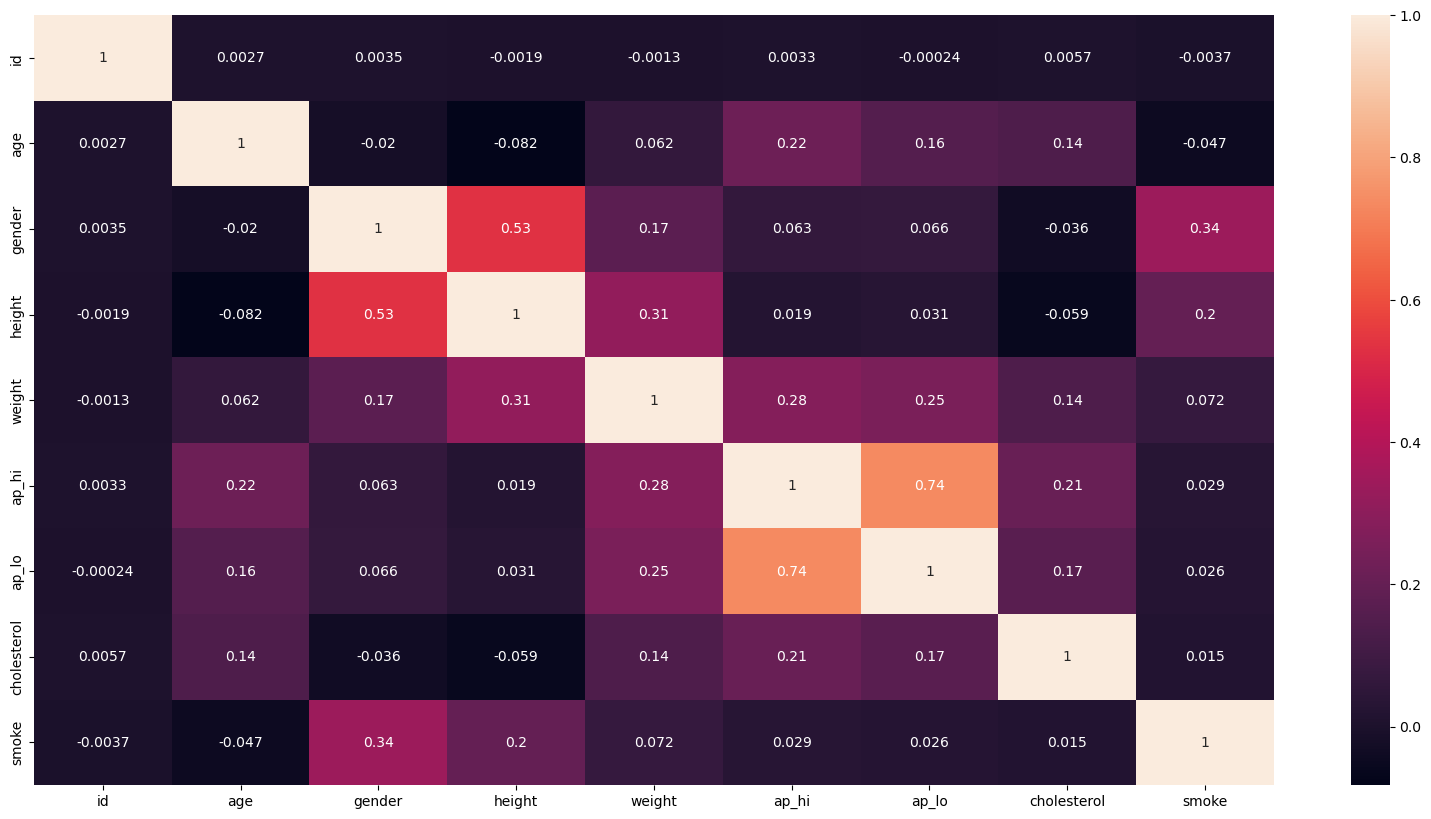

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
corr = data.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

In [24]:
height_avg = data.height.mean()
height_std = data.height.std()
len(data[data.height > height_avg + 2*height_std])/len(data.height)

0.020557142857142857

In [25]:
alco_df = pd.read_csv("cardio_alco.csv", sep = ";")
print(alco_df.shape)
alco_df.head()

(56903, 2)


,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [26]:
mrg_base_df = pd.merge(data, alco_df, on = "id", how="left")
mrg_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,18393,2,168,62.0,110,80,1,0,NaN
1,1,20228,1,156,85.0,140,90,3,0,NaN
2,2,18857,1,165,64.0,130,70,3,0,NaN
3,3,17623,2,169,82.0,150,100,1,0,NaN
4,4,17474,1,156,56.0,100,60,1,0,NaN


In [28]:
data_cleaned = mrg_base_df.dropna(subset=['alco'])

In [29]:
data_cleaned.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
32,44,14605,1,159,60.0,110,70,1,0,0.0
33,45,20652,1,160,73.0,130,85,1,0,0.0
34,46,21940,2,173,82.0,140,90,3,0,0.0
35,47,20404,1,163,55.0,120,80,1,0,0.0
36,49,18328,2,175,95.0,120,80,1,0,0.0


In [30]:
data_cleaned.alco.unique()

array([0., 1.])

In [31]:
# Convert ages to years and round down
data_cleaned['age'] = (data_cleaned['age'] / 365).astype(int)

# Filter individuals over 50
over_50_data = data_cleaned[data_cleaned['age'] > 50]

# Calculate the percentage of individuals over 50 who consume alcohol
percentage_over_50_with_alcohol = (over_50_data['alco'].sum() / len(over_50_data)) * 100

print(f"The percentage of the population over 50 years old who consume alcohol is {percentage_over_50_with_alcohol:.2f}%.")

The percentage of the population over 50 years old who consume alcohol is 4.91%.


C:\Users\mw50000150\AppData\Local\Temp\ipykernel_5196\955430216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age'] = (data_cleaned['age'] / 365).astype(int)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [33]:
import scipy.stats as stats

# Statement 1: Smokers have higher blood pressure than non-smokers
smokers_bp = data[data['smoke'] == 1]['ap_hi']
non_smokers_bp = data[data['smoke'] == 0]['ap_hi']
conf_interval_smokers_vs_non_smokers_bp = stats.ttest_ind(smokers_bp, non_smokers_bp, alternative='greater', nan_policy='omit')

# Statement 2: Smokers weigh less than non-smokers
smokers_weight = data[data['smoke'] == 1]['weight']
non_smokers_weight = data[data['smoke'] == 0]['weight']
conf_interval_smokers_vs_non_smokers_weight = stats.ttest_ind(smokers_weight, non_smokers_weight, alternative='less', nan_policy='omit')

# Statement 3: Smokers have higher cholesterol levels than non-smokers
smokers_cholesterol = data[data['smoke'] == 1]['cholesterol']
non_smokers_cholesterol = data[data['smoke'] == 0]['cholesterol']
conf_interval_smokers_vs_non_smokers_cholesterol = stats.ttest_ind(smokers_cholesterol, non_smokers_cholesterol, alternative='greater', nan_policy='omit')

# Statement 4: Men have higher blood pressure than women
men_bp = data[data['gender'] == 2]['ap_hi']
women_bp = data[data['gender'] == 1]['ap_hi']
conf_interval_men_vs_women_bp = stats.ttest_ind(men_bp, women_bp, alternative='greater', nan_policy='omit')

# Print the results
print(f"Statement 1: Smokers have higher blood pressure than non-smokers - {conf_interval_smokers_vs_non_smokers_bp}")
print(f"Statement 2: Smokers weigh less than non-smokers - {conf_interval_smokers_vs_non_smokers_weight}")
print(f"Statement 3: Smokers have higher cholesterol levels than non-smokers - {conf_interval_smokers_vs_non_smokers_cholesterol}")
print(f"Statement 4: Men have higher blood pressure than women - {conf_interval_men_vs_women_bp}")


Statement 1: Smokers have higher blood pressure than non-smokers - Ttest_indResult(statistic=-0.24394145890090257, pvalue=0.5963615628678365)
Statement 2: Smokers weigh less than non-smokers - Ttest_indResult(statistic=17.974105126565, pvalue=1.0)
Statement 3: Smokers have higher cholesterol levels than non-smokers - Ttest_indResult(statistic=2.7396284742488923, pvalue=0.0030762122067996426)
Statement 4: Men have higher blood pressure than women - Ttest_indResult(statistic=1.5888612549671324, pvalue=0.05604811829621948)


In [35]:
data2 = pd.read_csv('covid_data.csv')

In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [37]:
data2.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [39]:
data2['date'] = pd.to_datetime(data2.date)

In [41]:
data2.set_index('date')

,location,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
date,,,,,,,
2019-12-31,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
2020-01-01,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
2020-01-02,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
2020-01-03,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
2020-01-04,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...
2020-02-28,International,0,0,NaN,NaN,NaN,NaN
2020-02-29,International,0,2,NaN,NaN,NaN,NaN
2020-03-01,International,0,0,NaN,NaN,NaN,NaN


In [42]:
germany = data2[data2.location == "Germany"]
italy = data2[data2.location == "Italy"]

In [43]:
germany["cumsum"] = germany.new_cases.cumsum()
italy["cumsum"] = italy.new_cases.cumsum()
gr_it = pd.merge(germany, italy, on='date')

C:\Users\mw50000150\AppData\Local\Temp\ipykernel_5196\1346085788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany["cumsum"] = germany.new_cases.cumsum()
C:\Users\mw50000150\AppData\Local\Temp\ipykernel_5196\1346085788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy["cumsum"] = italy.new_cases.cumsum()


In [44]:
gr_it[abs(gr_it.cumsum_x - gr_it.cumsum_y) > 10000]

,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
72,Germany,2020-03-12,271,1,83783945.0,21.453,45229.245,8.0,1567,Italy,2313,196,60461828.0,23.021,35220.084,3.18,12462
73,Germany,2020-03-13,802,2,83783945.0,21.453,45229.245,8.0,2369,Italy,2651,189,60461828.0,23.021,35220.084,3.18,15113
74,Germany,2020-03-14,693,0,83783945.0,21.453,45229.245,8.0,3062,Italy,2547,252,60461828.0,23.021,35220.084,3.18,17660
75,Germany,2020-03-15,733,3,83783945.0,21.453,45229.245,8.0,3795,Italy,3497,173,60461828.0,23.021,35220.084,3.18,21157
76,Germany,2020-03-16,1043,4,83783945.0,21.453,45229.245,8.0,4838,Italy,2823,370,60461828.0,23.021,35220.084,3.18,23980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


In [45]:
italy.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsum
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18,0
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18,0
10690,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18,0
10691,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18,0
10692,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18,0


<Axes: xlabel='date', ylabel='cumsum'>

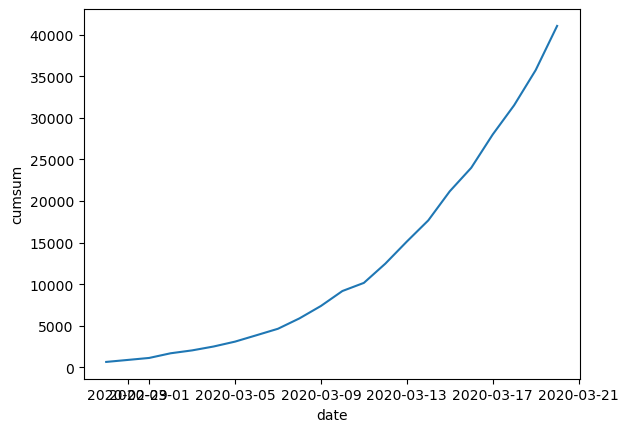

In [46]:
sns.lineplot(data=italy[(italy.date >= "2020-02-28") & (italy.date <= "2020-03-20")], x = 'date', y='cumsum')

C:\Users\mw50000150\AppData\Local\Temp\ipykernel_5196\2703421789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy['date'] = pd.to_datetime(italy['date'])
C:\Users\mw50000150\AppData\Local\Temp\ipykernel_5196\2703421789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy['days_passed'] = (italy['date'] - italy['date'].min()).dt.days
C:\Users\mw50000150\AppData\Local\Temp\ipykernel_5196\2703421789.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

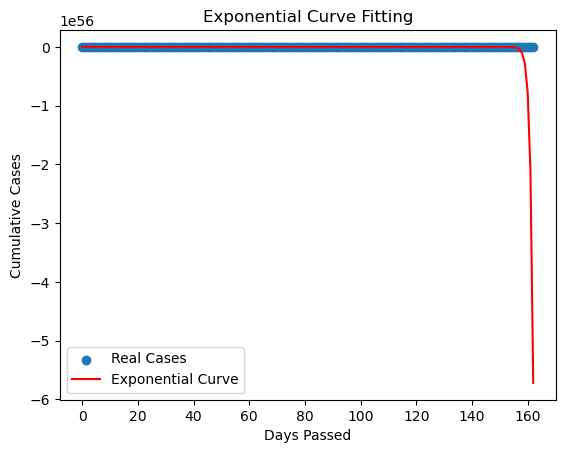

The difference between the exponential curve and the total number of real cases on 2020-03-20 is approximately -1554595421871311130206481137196440045210636561999032483840.00.


In [48]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Convert 'date' to datetime type
italy['date'] = pd.to_datetime(italy['date'])

# Calculate days passed since the first date
italy['days_passed'] = (italy['date'] - italy['date'].min()).dt.days

# Define the exponential function
def exponential_func(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential curve
params, covariance = curve_fit(exponential_func, italy['days_passed'], italy['cumsum'])

# Extract parameters A and B
A, B = params

# Calculate the exponential curve values
italy['exponential_curve'] = exponential_func(italy['days_passed'], A, B)

# Plot the data and the fitted curve
plt.scatter(italy['days_passed'], italy['cumsum'], label='Real Cases')
plt.plot(italy['days_passed'], italy['exponential_curve'], color='red', label='Exponential Curve')
plt.xlabel('Days Passed')
plt.ylabel('Cumulative Cases')
plt.title('Exponential Curve Fitting')
plt.legend()
plt.show()

# Calculate the difference between the exponential curve and the total number of real cases on 2020-03-20
real_cases_on_2020_03_20 = italy.loc[italy['date'] == '2020-03-20', 'cumsum'].values[0]
difference = A * np.exp(B * (italy['days_passed'].max() + 1)) - real_cases_on_2020_03_20

print(f"The difference between the exponential curve and the total number of real cases on 2020-03-20 is approximately {difference:.2f}.")


In [49]:

# Convert 'date' to datetime type
data2['date'] = pd.to_datetime(data2['date'])

# Calculate the death rate (total number of deaths per million inhabitants)
data2['death_rate'] = (data2['new_deaths'] / data2['population']) * 1e6

# Rank the countries based on death rate
ranked_countries = data2.groupby('location')['death_rate'].max().sort_values(ascending=False)

# Identify the country with the 3rd highest death rate
third_highest_death_rate_country = ranked_countries.index[2]

print(f"The country with the 3rd highest death rate is: {third_highest_death_rate_country}")


The country with the 3rd highest death rate is: Sint Maarten (Dutch part)


In [50]:
ranked_countries

location
Montserrat                          200.040008
San Marino                          176.792975
Sint Maarten (Dutch part)            93.279231
Isle of Man                          58.801392
Andorra                              51.769883
                                       ...    
Eritrea                               0.000000
Saint Kitts and Nevis                 0.000000
Saint Lucia                           0.000000
Saint Vincent and the Grenadines      0.000000
International                              NaN
Name: death_rate, Length: 212, dtype: float64

In [51]:
ranked_countries.head(10)

location
Montserrat                   200.040008
San Marino                   176.792975
Sint Maarten (Dutch part)     93.279231
Isle of Man                   58.801392
Andorra                       51.769883
Monaco                        50.963205
Ireland                       47.389564
Belgium                       42.796931
Jersey                        39.575356
Chile                         33.950246
Name: death_rate, dtype: float64

In [52]:
data2

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death_rate
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,0.0
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,0.0
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,0.0
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,0.0
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,0.0
...,...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN,NaN


In [53]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
 8   death_rate                  23018 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 1.6+ MB


In [58]:
# Remove rows with missing information
data = data2.dropna(subset=['aged_65_older_percent', 'new_deaths', 'population'])

# Calculate Death Rate
data['death_rate'] = (data['new_deaths'] * 1e6) / data['population']

# Define the conditions for positive and negative cases
positive_condition = (data['aged_65_older_percent'] > 20) & (data['death_rate'] > 50)
negative_condition = ~positive_condition
sum(negative_condition)
# # Calculate TP, FP, FN, TN
# TP = sum(positive_condition)
# FP = sum(negative_condition)
# FN = sum(positive_condition)
# TN = sum(negative_condition)

# # Calculate Precision, Recall, and F1 score
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# f1_score = 2 * (precision * recall) / (precision + recall)

# print(f"The F1 score for the given statement is: {f1_score:.2f}")


C:\Users\mw50000150\AppData\Local\Temp\ipykernel_5196\1310664726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['death_rate'] = (data['new_deaths'] * 1e6) / data['population']


20643

In [60]:
data2[]

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death_rate
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000,23018.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687,0.540004
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700,3.331772
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000,-41.022541
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000,0.000000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000,0.000000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000,0.074389
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000,200.040008


In [61]:
covid_data = pd.read_csv('covid_data.csv')

In [62]:
covid_data

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [63]:
# Remove rows with missing information
data = covid_data.dropna(subset=['gdp_per_capita', 'hospital_beds_per_thousand'])

# Calculate conditional probabilities
total_countries = len(data)
gdp_over_10000_and_beds_over_5 = len(data[(data['gdp_per_capita'] > 10000) & (data['hospital_beds_per_thousand'] >= 5)])
beds_over_5 = len(data[data['hospital_beds_per_thousand'] >= 5])

conditional_probability = gdp_over_10000_and_beds_over_5 / beds_over_5

print(f"The probability that a country has a GDP over 10,000 given that they have at least 5 hospital beds per 1000 inhabitants is: {conditional_probability:.4f}")


The probability that a country has a GDP over 10,000 given that they have at least 5 hospital beds per 1000 inhabitants is: 0.9193
